Checkpoint Objective

Logistic Regression:

In this checkpoint, we are going to work again on the Titanic data set, but this time we will use logistic regression to predict if a passenger will survive or not. 

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn .metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

In [59]:
df= pd.read_csv('titanic-passengers.csv', sep = ';')

In [60]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [61]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [79]:
df.drop('Cabin', axis= 1 , inplace = True)

In [80]:
df['Age'].fillna(df['Age'].mean(), inplace= True)
df['Age'].isnull().sum()

0

In [81]:
encoder = LabelEncoder()
df['Survived']= encoder.fit_transform(df['Survived'])
df['Sex']= encoder.fit_transform(df['Sex'])

In [82]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,S
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,S
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,S


1. Apply logistic regression. 

In [83]:
x = df[['Sex']]
y = df['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0) 

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred  = logreg.predict(x_test)
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.83


2. Use a confusion matrix to validate your model. 

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

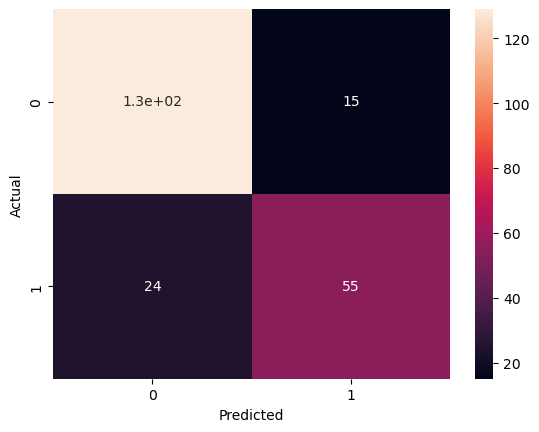

In [84]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

3. Another validation matrix for classification is ROC / AUC. Do your research on them, explain them, and apply them in our case.

In [85]:
# ROC/ AUC are a validation matrix and graph that show the performance of a classification model at all possible thresholds
# AUC measures how well a model is able to distinguish between classes
# ROC is plotted between two parameters:
# 1- TRUE POSITIVE RATE
# 2- FALSE POSITIVE RATE
# TPR/Recall/Sensitivity is ratio of positive examples that are correctly identified 
# and FPR / specifity is the ratio of negative examples that are incorrectly classified.
# AUC is the entire area beneath this ROC curve

In [86]:
auc = np.round(roc_auc_score(y_test, y_pred), 3)
 
print("Auc for our sample data is {}". format(auc))

Auc for our sample data is 0.796


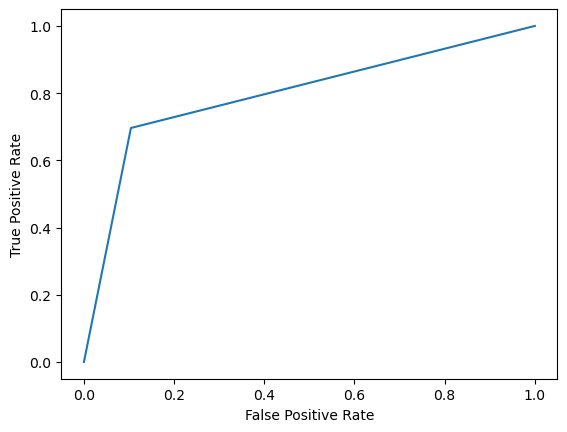

In [87]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()